# House Price Prediction

- In this project we are using Xt boost regression algorithm model

-  what is Xt boost regression model?
         -  Xt boost regression algorithm model is a type of gradient
            boosting algorithm that is used for solving regression problem.
         -  It is popular and efficient machine learning library that
            implement radient boosted decision trees.
         -  It work well with heterogeneous and tabular data, and can 
            handle missing values, outliers and features interactions.
         -  It also supports parallel processing, regularization and 
            early stopping
         
- when we use Xt boost regression model
         -  problem comes structured or tabular data, and we 
            want a fast accuracy solution. 
         -  It can handle complex and non-linear relationships between 
            features and target variables, and it can also deal with
            various challenges such as overfitting, missing values, 
            outliers and feature interactions 

## Work Flow

House Price Data -> Data pre processing -> Data Analysis ->Train and Test split -> XG/Xt Boost Regressoor -> Evaluation

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston    #### for loading the dataset of the house price
from sklearn.model_selection import train_test_split   #### For training and testing the model
from sklearn import metrics  #### this model is used to measure the accuracy in model, how much error it make, how similar you predicitons are
from xgboost import XGBRegressor   #### for model Xt/XG Boost Regression

In [5]:
hourse_price_data=load_boston()

In [11]:
hourse_price_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [13]:
data_house=pd.DataFrame(hourse_price_data.data)

In [14]:
data_house

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
data_house.shape

(506, 13)

In [16]:
data_house.size

6578

In [20]:
# print first 5 data in the dataframe
data_house.head() 


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
# the upper cell print the 5 data of the dataframe, but didn't print the column name
# for printing the column name we use "column" function 

# DataFrame is the funciton which convert data into well manner columns and rows

data_house=pd.DataFrame(hourse_price_data.data,columns=hourse_price_data.feature_names)

In [28]:
# Now the column name added to the data
data_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
# Now added the price column to the data
# for this we declear a "price" variable which store the value of prices(target)

data_house["Price"]=hourse_price_data.target

In [40]:
# Price column now added

data_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
# now checking numbers of rows and columns
data_house.shape

(506, 14)

In [55]:
# checking for missing values

data_house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [56]:
# statistical measurements of the dataframe
data_house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
# Now we are finding the correlation in the dataset between the columns
data_house_correlation=data_house.corr()
data_house.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

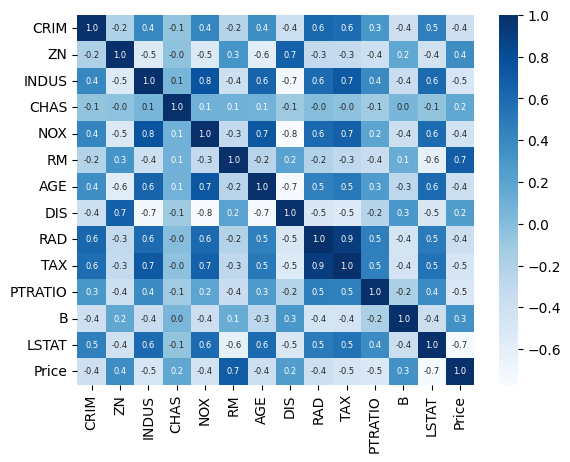

In [79]:
# the upper cell represent the correlation betweeen the columns but we need images for better understanding 
# for this we use seaborn and matplotlib "Heatmap"

sns.heatmap(data_house_correlation,fmt='.1f',annot=True,annot_kws={'size':6},cmap='Blues')

# with the help of heatmap we find the correlation between the columns
# fmt='.1f' this will give only one digit value after decimal 
# annot=True this will give the value of individual box(or I said the correlation value will represent on the box)
# annot_kws={'size':6} this will give the sizse of the "annot" values
# cmap="Blues" change the colors

In [81]:
# splitting the data and target(Price)
# or 
# splitting dependent and independent variables

In [87]:
x=data_house.iloc[:,:-1] #### storing the Independent varialbes in x
# ------------------------------------or--------------------------------------
# x=data_house.drop(['Price'],axis=1)

y=data_house.iloc[:,-1] #### storing the Dependent variables in y
# ------------------------------------or--------------------------------------
#y=data_house['Price']

In [92]:
# After splitting the data in to Independent and Dependent variables we again split the data into Train and Test data

X_Train,X_Test,Y_Train,Y_Test=train_test_split(x,y,train_size=0.3,random_state=1)

In [96]:
print(x.shape)
print(X_Train.shape)
print(X_Test.shape)

(506, 13)
(151, 13)
(355, 13)


#### Model Training

In [99]:
#### XGBoost Regression
model=XGBRegressor()

In [101]:
#### Training the model with X_train
model.fit(X_Train,Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Evaluation

In [104]:
#### Prediction on training data

#### Try to find the accuracy for prediction on training data
training_data_prediction=model.predict(X_Train)

In [108]:
print(training_data_prediction)

[16.464733  20.928295  25.811378  19.871515  32.20513   21.38764
 27.529509  18.391184  20.37845   26.913074  15.338007  15.3880625
 48.007393  21.631405  18.722435  21.231907  17.764482  21.923555
 21.362394  21.32275   27.835482  29.903831  26.59678    9.99827
 21.457891  22.377714  20.07996   12.64087    9.667588  20.315355
 23.429337  40.265358  23.714102  33.074688  20.894379  13.715632
  9.901624  38.94919   26.656532  44.83524   36.393406  21.506702
 30.778437  21.827793  34.359383  24.040476  29.75958   19.841326
 14.563332  24.065521  31.41916   24.909908  26.023129  25.930065
  8.671354  24.961763  28.201109  14.083031  10.82222   33.34674
 22.99568   17.49993   50.57246   22.855616  17.907528  16.543182
 15.63955   12.229319  31.77657   18.35819   49.144485  22.405098
 22.2276    20.756273  16.771597  45.92337   15.970434  45.39251
 21.673021  14.963726  37.384613  30.282587  20.616018  20.053272
 28.83904   19.828484  18.506918  27.551306  16.73005   21.27109
 24.91379   46

In [112]:
# Now comparing the prediction and the given values of the price
# with the help of R square error
score_1=metrics.r2_score(Y_Train,training_data_prediction)

## getting another value
## Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_Train,training_data_prediction)

In [115]:
print("R square error {} and mean absolute error {}".format(score_1,score_2))

R square error 0.8356513275313057 and mean absolute error 2.315531163499845


Text(0.5, 1.0, 'Actual vs Predicted')

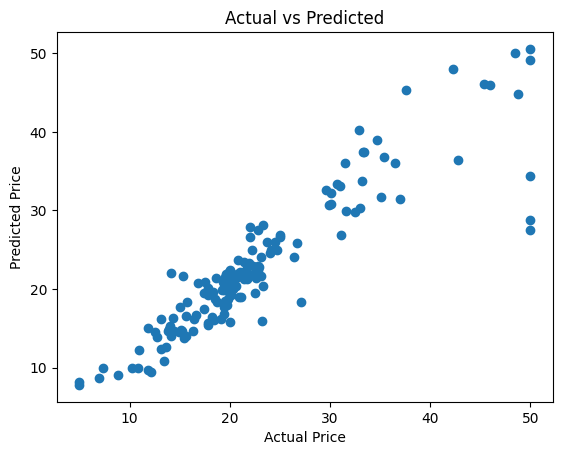

In [126]:
# plotting the graph between old price(Y_Train) and new price(training_data_prediction)
plt.scatter(Y_Train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")

# Testing Prediction

In [116]:
# after finding the prediction of Testing data
# we are finding the prediction of Test data

testing_data_prediction=model.predict(X_Test)

In [117]:
testing_data_prediction

array([28.193819 , 23.933846 , 16.606998 , 21.976055 , 20.800642 ,
       22.983084 , 27.897272 , 14.50881  , 21.50338  , 22.5885   ,
       23.713963 , 31.197037 , 19.302069 , 19.394701 , 19.390566 ,
       27.897612 , 13.892672 , 49.98464  , 24.098358 , 14.606001 ,
       16.218012 , 15.603449 , 23.814528 , 24.960663 , 23.504719 ,
        8.299756 , 13.495007 , 17.496151 , 43.076653 , 11.519894 ,
       24.112263 , 18.504757 , 49.997177 , 12.597655 , 19.806044 ,
       24.470572 , 14.915795 , 36.197197 , 11.913118 , 19.11298  ,
       22.600645 , 20.692173 , 30.039621 , 13.310305 , 14.592616 ,
        8.399589 , 49.998615 , 12.696013 , 25.012495 , 18.59501  ,
       29.80264  , 22.194914 , 28.700619 , 23.7726   ,  8.105434 ,
       22.216192 ,  6.3118644, 22.12966  , 17.507137 , 48.27673  ,
       16.686584 , 26.605928 ,  8.494127 , 14.503615 , 23.693491 ,
       37.20111  , 41.704906 , 16.485712 , 21.691038 , 22.692705 ,
       23.029219 , 10.485141 , 21.889349 , 20.996302 , 20.4030

In [120]:
test_scoring_1=metrics.r2_score(Y_Test,testing_data_prediction)
test_scoring_2=metrics.mean_absolute_error(Y_Test,testing_data_prediction)

In [121]:
print("R square {} and Mean absolute error {}".format(test_scoring_1,test_scoring_2))

R square 0.9999971859307322 and Mean absolute error 0.010847812706316053


Text(0.5, 1.0, 'Test vs Predicted Price')

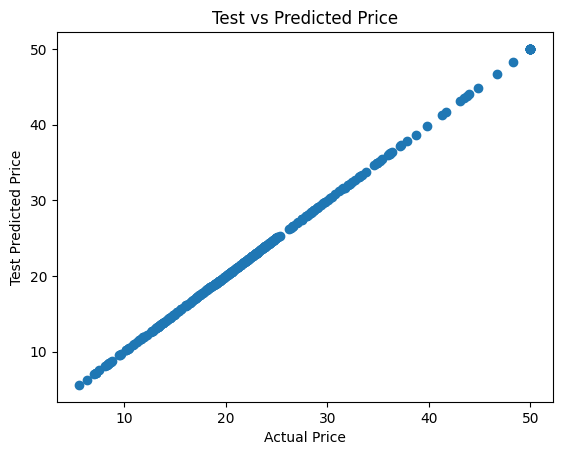

In [128]:
# plotting the graph between Testing and Predicted Testing values
plt.scatter(Y_Test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Test Predicted Price")
plt.title("Test vs Predicted Price")